<a href="https://colab.research.google.com/github/sarychief/projects/blob/main/PyTorch_mains_and_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch

In [ ]:
import torch

In [ ]:
torch.zeros([3, 4])   
# Создание тензора 2-го ранга 3 на 4

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
torch.zeros([2, 3, 4])  
# Создание тензора 3-го ранга по 3 строчки, 4 столбца двух слоев 

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

In [ ]:
x = torch.Tensor([[0, 1, 2, 3, 4],
                  [1, 1, 2, 3, 4],
                  [2, 1, 2, 3, 4]])
# Создание инициализированного тензора произвольной размерности

In [ ]:
x.size()
x.shape

torch.Size([3, 5])

### Можно производить арифметические операции с тензорами + / - / * / // / % (но только той же размерности)

In [ ]:
torch.exp(x)

tensor([[ 1.0000,  2.7183,  7.3891, 20.0855, 54.5981],
        [ 2.7183,  2.7183,  7.3891, 20.0855, 54.5981],
        [ 7.3891,  2.7183,  7.3891, 20.0855, 54.5981]])

In [ ]:
torch.log(x)

tensor([[  -inf, 0.0000, 0.6931, 1.0986, 1.3863],
        [0.0000, 0.0000, 0.6931, 1.0986, 1.3863],
        [0.6931, 0.0000, 0.6931, 1.0986, 1.3863]])

In [ ]:
torch.sin(x)

tensor([[ 0.0000,  0.8415,  0.9093,  0.1411, -0.7568],
        [ 0.8415,  0.8415,  0.9093,  0.1411, -0.7568],
        [ 0.9093,  0.8415,  0.9093,  0.1411, -0.7568]])

## Логические операции


In [ ]:
x

tensor([[0., 1., 2., 3., 4.],
        [1., 1., 2., 3., 4.],
        [2., 1., 2., 3., 4.]])

In [ ]:
mask = x > 3
x[mask]

tensor([4., 4., 4.])

## Копирование 

In [ ]:
y = x # будет ссылочное копирование

y = x.clone()   # надо вот так 

## Типы 

In [ ]:
x.dtype

torch.float32

In [ ]:
x = x.double()

In [ ]:
x.dtype

torch.float64

## Привращение массива типа numpy array в тензор

In [ ]:
import numpy as np

npx = np.array([[1,2,3,4,5],
               [5,4,3,2,1]])
npx

array([[1, 2, 3, 4, 5],
       [5, 4, 3, 2, 1]])

In [ ]:
npx = torch.from_numpy(npx)
npx

tensor([[1, 2, 3, 4, 5],
        [5, 4, 3, 2, 1]])

In [ ]:
npx = np.array(npx)
npx

array([[1, 2, 3, 4, 5],
       [5, 4, 3, 2, 1]])

## Приколы

In [ ]:
t = torch.rand([2,3])

In [ ]:
torch.cuda.is_available()

False

# Реализация градиентного спуска

In [ ]:
import torch

w = torch.tensor([[5., 10.], [1., 2.]], requires_grad=True)
alpha = 0.001
optimizer = torch.optim.SGD([w], lr = 0.001)

for _ in range(500):
    function = (w + 7).log().log().prod()
    function.backward()
    optimizer.step()
    optimizer.zero_grad()

print(w) 

tensor([[4.9900, 9.9948],
        [0.9775, 1.9825]], requires_grad=True)


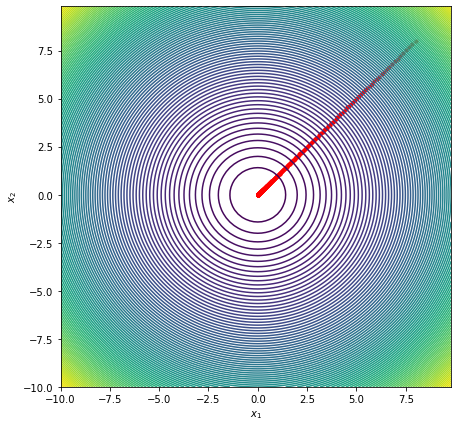

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_contours(objective,
                  x_lims=[-10.0, 10.0], 
                  y_lims=[-10.0, 10.0],
                  x_ticks=100,
                  y_ticks=100):
    x_step = (x_lims[1] - x_lims[0]) / x_ticks
    y_step = (y_lims[1] - y_lims[0]) / y_ticks
    X, Y = np.mgrid[x_lims[0]:x_lims[1]:x_step, y_lims[0]:y_lims[1]:y_step]
    res = []
    for x_index in range(X.shape[0]):
        res.append([])
        for y_index in range(X.shape[1]):
            x_val = X[x_index, y_index]
            y_val = Y[x_index, y_index]
            res[-1].append(objective(np.array([[x_val, y_val]]).T))
    res = np.array(res)
    plt.figure(figsize=(7,7))
    plt.contour(X, Y, res, 100)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

x = torch.tensor(
    [8., 8.], requires_grad=True)
var_history = []
fn_history = []

def function_parabola(variable):
    return 10 * (variable ** 2).sum()

def make_gradient_step(function, variable):
    function_result = function(variable)
    function_result.backward()
    variable.data -= 0.001 * variable.grad
    variable.grad.zero_()

for i in range(500):
    var_history.append(x.data.cpu().numpy().copy())
    fn_history.append(function_parabola(x).data.cpu().numpy().copy())
    make_gradient_step(function_parabola, x)


show_contours(function_parabola)
plt.scatter(np.array(var_history)[:,0], np.array(var_history)[:,1], s=10, c='r');

# Реальная нейросеть на торче
## Задача - предсказать функцию синус

Данные

In [ ]:
import torch
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13.0, 5.0)

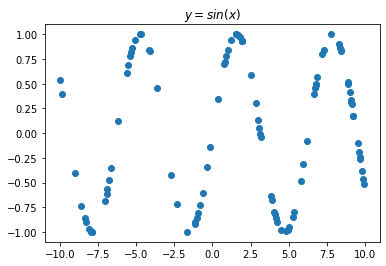

In [ ]:
x_train = torch.rand(100)          
# создаем 100 рандомных значений

x_train = x_train * 20.0 - 10.0
# ну чтоб график был по центру

y_train = torch.sin(x_train)
# y'ки будут синусы от данных точек

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('$y = sin(x)$');
# вывод графика

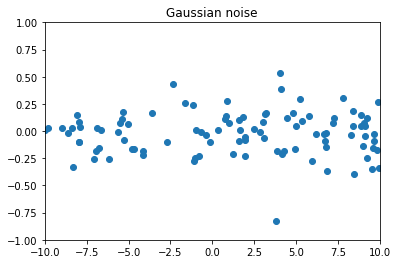

In [ ]:
noise = torch.randn(y_train.shape) / 5.
# создвние шума

plt.plot(x_train.numpy(), noise.numpy(), 'o')
plt.axis([-10, 10, -1, 1])
plt.title('Gaussian noise');

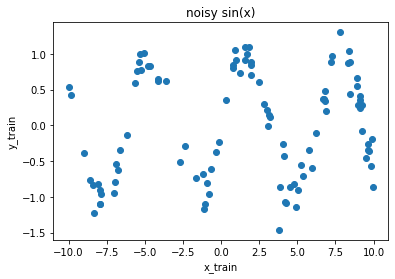

In [ ]:
y_train = y_train + noise
# к каждой точке х прибавляем точку шума (просто суммируем значения)

plt.plot(x_train.numpy(), y_train.numpy(), 'o')
plt.title('noisy sin(x)')
plt.xlabel('x_train')
plt.ylabel('y_train');

Теперь необходимо преобразовать данные в вектор векторов
В дальнейшем нам это пригодится


In [ ]:
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

tensor([[ 0.3607],
        [ 0.1220],
        [ 0.3510],
        [-0.8603],
        [-0.6256],
        [ 0.8503],
        [-0.9428],
        [-0.7028],
        [ 1.0992],
        [ 0.8809],
        [ 0.6237],
        [-0.3483],
        [ 0.8338],
        [-0.0103],
        [ 0.2910],
        [-0.7369],
        [-1.2285],
        [-0.8565],
        [ 0.1997],
        [ 0.8688],
        [ 0.8068],
        [-0.2644],
        [-0.8329],
        [-0.9081],
        [ 0.7570],
        [-0.9624],
        [-1.4624],
        [ 0.5455],
        [ 1.0412],
        [-0.3603],
        [-0.7984],
        [-0.2838],
        [ 0.8864],
        [-0.3767],
        [-0.3469],
        [-0.8258],
        [-0.4338],
        [-0.5652],
        [ 0.6021],
        [-0.1405],
        [-0.1079],
        [-0.7574],
        [-0.2371],
        [-1.0977],
        [ 0.2820],
        [ 0.4372],
        [-0.0743],
        [ 0.7062],
        [-0.5165],
        [-1.1750],
        [-0.5389],
        [-1.0870],
        [ 1.

Создадим валидационные данные без шума

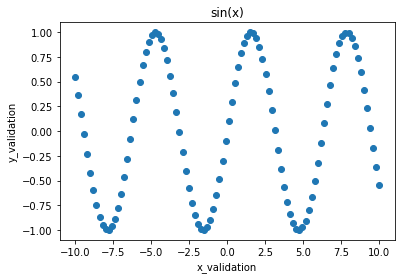

In [ ]:
x_validation = torch.linspace(-10, 10, 100)
y_validation = torch.sin(x_validation.data)
plt.plot(x_validation.numpy(), y_validation.numpy(), 'o')
plt.title('sin(x)')
plt.xlabel('x_validation')
plt.ylabel('y_validation');

In [ ]:
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1);

In [ ]:
x_train =  torch.linspace(-10, 5, 100)
y_train = target_function(x_train)
noise = torch.randn(y_train.shape) / 20.
y_train = y_train + noise
x_train.unsqueeze_(1)
y_train.unsqueeze_(1)

x_validation = torch.linspace(-10, 5, 100)
y_validation = target_function(x_validation)
x_validation.unsqueeze_(1)
y_validation.unsqueeze_(1)

tensor([[-1.5482e-04],
        [-1.0732e-03],
        [ 7.0097e-04],
        [-5.7608e-04],
        [ 6.5311e-04],
        [ 9.8906e-04],
        [-1.7836e-03],
        [ 1.5283e-03],
        [ 1.8686e-03],
        [ 2.1850e-03],
        [ 3.2003e-04],
        [ 2.6802e-03],
        [ 3.3656e-03],
        [-2.4106e-03],
        [ 1.0479e-03],
        [-4.6642e-03],
        [ 3.9665e-03],
        [ 4.9868e-03],
        [-4.1531e-03],
        [ 6.0007e-03],
        [-2.5418e-03],
        [-2.2237e-03],
        [ 8.5996e-03],
        [-3.8417e-03],
        [ 7.4946e-03],
        [-1.2848e-02],
        [-1.0455e-02],
        [-6.5003e-03],
        [-1.1817e-02],
        [-2.0529e-02],
        [-2.9806e-03],
        [ 2.4776e-02],
        [-2.3459e-02],
        [ 1.7232e-02],
        [-1.7709e-02],
        [ 2.7786e-02],
        [-4.1880e-02],
        [ 3.9170e-02],
        [ 4.1222e-03],
        [-5.7028e-02],
        [ 2.3339e-02],
        [ 6.8612e-02],
        [-1.0514e-02],
        [-8

## Создание нейросети

In [ ]:
import torch
import torch.nn as nn

class SineNet(nn.Module):                         
  # наследование функционала для формирования нейросети
  
  def __init__(self, n_hidden_neurons):           
  # инициализация слоев нейросети
  # self и n_hidden_neurons - количество нейронов в скрытом слое (в каждном, не сумме)
    
    super(SineNet, self).__init__()   
    # перегрузка конструктора

    self.fc1 = nn.Linear(1, n_hidden_neurons)
    # Fully connected layer - полносвязный слой с параметрами 1 - количество входных значений и 2 - нейронов в слое

    self.act1 = nn.Sigmoid()
    # Присваение первому слою сигмоидную активационную функциючя

    self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
    # второй слой с одним нейроном с выходным значением (регрессия же)

    self.act2 = nn.Sigmoid()

    self.fc3 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
    # второй слой с одним нейроном с выходным значением (регрессия же)

    self.act3 = nn.Sigmoid()

    self.fc4 = nn.Linear(n_hidden_neurons,1)


  def forward(self, x):
    # Последовательное связывание слоев
    
    x = self.fc1(x)
    # применение первого слоя

    x = self.act1(x)
    # полученный результат передаем в функцию активации
    
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    x = self.act3(x)
    x = self.fc4(x)

    return x

In [ ]:
sin_net = SineNet(200)

### Немножечко оптимизации

In [ ]:
optimizer = torch.optim.Adam(sin_net.parameters(), lr=0.01)
# передаем существующие параметры нейросети (веса) и инициализируем гамма (темп заучивания)

In [ ]:
def loss(pred, target):
  # MSE
  squares = (pred - target)**2
  return squares.mean()

In [ ]:
for epoch_index in range(2000):
    optimizer.zero_grad()
    # зануляем градиенты, чтобы потом про это не забыть (кстати, а зачем?)

    y_pred = sin_net.forward(x_train)
    loss_val = loss(y_pred, y_train)

    loss_val.backward()

    optimizer.step()


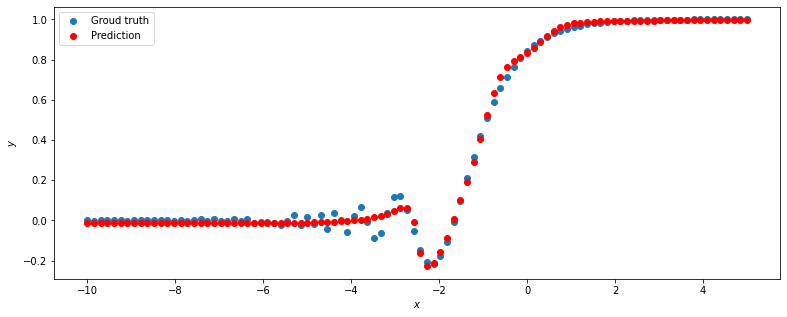

In [ ]:
def predict(net, x, y):   
  # 1 - объект нейросети 2 & 3 - данные
    y_pred = sin_net.forward(x)

    plt.plot(x.numpy(), y.numpy(), 'o', label='Groud truth')
    plt.plot(x.numpy(), y_pred.data.numpy(), 'o', c='r', label='Prediction');
    plt.legend(loc='upper left')
    plt.xlabel('$x$')
    plt.ylabel('$y$')


predict(sin_net, x_validation, y_validation)

In [ ]:
def metric(pred, target):
  # MAE
   return (pred - target).abs().mean()

print(metric(sin_net.forward(x_validation), y_validation).item())

0.017366474494338036
